# Loading Libraries

In [1]:
# Import  the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Loading the Dataset

df = pd.read_csv("/content/drive/MyDrive/Luminar_Projects/Project_1/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Basics EDA

In [3]:
# checking the unique values in Target variable

df["Outcome"].unique()

array([1, 0])

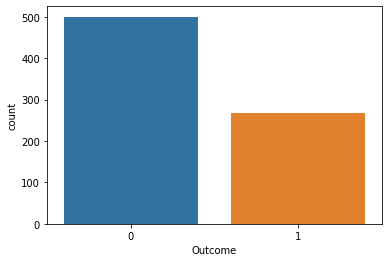

In [4]:
# ploting the target variable
sns.countplot(x="Outcome",data=df)
plt.show()

In [5]:
# checking the value count in Target variable
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# Shape of the datset
df.shape

(768, 9)

In [7]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Identify the Missing Values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
#Correlation on Dataset based on Target variable
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

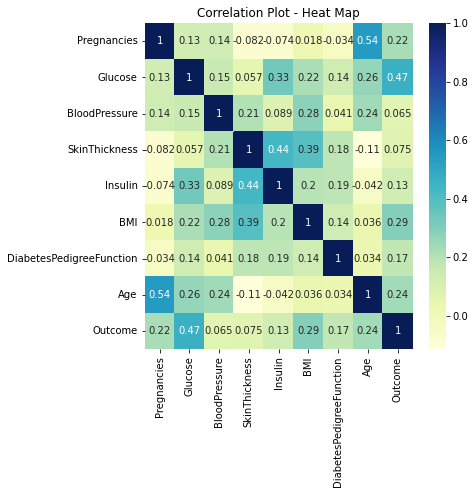

In [11]:
# Correlation using Heat Map in Input Dataset
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title('Correlation Plot - Heat Map')
plt.show()

In [12]:
# Pairplot using sns
# sns.pairplot(df,hue="Outcome")


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
print('Total zero Glucose values: ' + str(df[df["Glucose"]==0].shape[0]))
print('Total zero BloodPressure values: ' + str(df[df["BloodPressure"]==0].shape[0]))
print('Total zero SkinThickness values: ' + str(df[df["SkinThickness"]==0].shape[0]))
print('Total zero Insulin values: ' + str(df[df["Insulin"]==0].shape[0]))
print('Total zero BMI values: ' + str(df[df["BMI"]==0].shape[0]))
print('Total zero DiabetesPedigreeFunction values: ' + str(df[df["DiabetesPedigreeFunction"]==0].shape[0]))
print('Total zero Age values: ' + str(df[df["Age"]==0].shape[0]))

Total zero Glucose values: 5
Total zero BloodPressure values: 35
Total zero SkinThickness values: 227
Total zero Insulin values: 374
Total zero BMI values: 11
Total zero DiabetesPedigreeFunction values: 0
Total zero Age values: 0


# Missing value Treatment

In [15]:
df['SkinThickness'].loc[(df['SkinThickness']==0)] =df['SkinThickness'].median()
df['Glucose'].loc[(df['Glucose']==0)] =df['Glucose'].median()
df['BloodPressure'].loc[(df['BloodPressure']==0)] =df['BloodPressure'].median()
df['Insulin'].loc[(df['Insulin']==0)] =df['Insulin'].median()
df['BMI'].loc[(df['BMI']==0)] =df['BMI'].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

# Outlier Treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


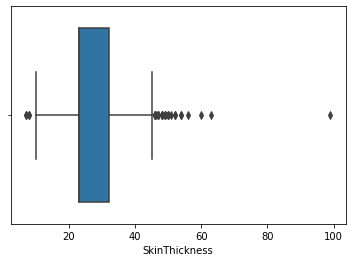

In [16]:
sns.boxplot(df['SkinThickness'])


In [17]:
numericalColumns = df.select_dtypes(include=np.number).columns
numericalColumns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if df[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [19]:
continuesCols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [20]:
for column in continuesCols:
    upper_lim=df[column].mean()+df[column].std() *3
    lower_lim=df[column].mean()-df[column].std() *3

    df.loc[(df[column] > upper_lim),column] = upper_lim
    df.loc[(df[column] < lower_lim),column] = lower_lim

# Train Test Split

In [21]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

# Scale Down

In [40]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)



import joblib 
joblib.dump(scale,'/content/drive/MyDrive/Luminar_Projects/Project_1/scale.pkl')

['/content/drive/MyDrive/Luminar_Projects/Project_1/scale.pkl']

# Apply all classification Algorithms

In [23]:
# Apply all classification Algorithms -- Include Train Acc, Test acc, Precision, Recall, F1 score  -- In For loop
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()


voting = VotingClassifier( estimators=[('Logistic_Regression',lr_clf),('Decision_Tree_Classifier',df_clf),('Random_Forest_Classifier',rf_clf),
                              ('AdaBoost_Classifier',adboost_clf),('Gradient_Boosting_Classifier',grad_clf),('SVC',svc_clf)], voting='hard')

voting.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gradient_Boosting_Classifier',
                              GradientBoostingClassifier()),
                             ('SVC', SVC())])

In [24]:
for clf in (lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,clf.score(X_train,y_train))
  print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

  print("=========================")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression 0.7877094972067039
LogisticRegression 0.7402597402597403
DecisionTreeClassifier 1.0
DecisionTreeClassifier 0.7359307359307359
RandomForestClassifier 1.0
RandomForestClassifier 0.7445887445887446
AdaBoostClassifier 0.8528864059590316
AdaBoostClassifier 0.7316017316017316
GradientBoostingClassifier 0.925512104283054
GradientBoostingClassifier 0.7662337662337663
SVC 0.7858472998137802
SVC 0.7056277056277056


# Hyperparameter Tunning

In [25]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['log_loss’, ‘deviance’, ‘exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','mse']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]




clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]

In [26]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]




clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]

In [32]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_scaled,y_train)
  
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_train)}")

  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")

  print(f"The Best param for the {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.7802607076350093
The Test accuracy for the LogisticRegression() is 0.7359307359307359
The Best param for the LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.7951582867783985
The Test accuracy for the DecisionTreeClassifier() is 0.70995670995671
The Best param for the DecisionTreeClassifier() is {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 3, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 's

In [28]:
# Voiting Classifier -- -- Include Train Acc, Test acc, Precision, Recall, F1 score

In [34]:
# Making the best model - Random Forest

random_clf = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2', n_estimators= 9)
random_clf.fit(X_train_scaled,y_train)



RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=9)

In [39]:

import joblib 
joblib.dump(random_clf,'/content/drive/MyDrive/Luminar_Projects/Project_1/model.pkl')

['/content/drive/MyDrive/Luminar_Projects/Project_1/model.pkl']